## Mapa de Ollas Comunes

In [1]:
import urbanpy as up
import pandas as pd
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt
import geoplot as gplt
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.lines import Line2D

In [2]:
# Read ollas_comunes from downloads
df_ollas_comunes = pd.read_csv("inputs/ollas_comunes_2023-08-08.csv", sep=";")
df_ollas_comunes.head()

,Nombre de la Olla Comun,Ubicacion GPS,_Ubicacion GPS_latitude,_Ubicacion GPS_longitude,_Ubicacion GPS_altitude,_Ubicacion GPS_precision,_uuid
0,Olla Común Niño Jesús,NaN,NaN,NaN,NaN,NaN,c30bf0ee-c247-44f0-b960-b683f83eb646
1,Olla común Sector F Santa Rosa,NaN,NaN,NaN,NaN,NaN,900b1356-0a16-4957-bb70-05ee0c49a3d3
2,Sol Radiante,-12.093042 -76.88904 0 15.44080638885498,-12.093042,-76.889040,0.0,15.440806,ecadad4e-abc0-46e6-9707-1d4ebae460c7
3,Los Linderos,-12.094971 -76.886939 0 45.350807189941406,-12.094971,-76.886939,0.0,45.350807,aff61607-84bf-479e-99aa-07291aa9ddfd
4,Olla Bella Esmeralda,-12.107129 -76.879143 0 1,-12.107129,-76.879143,0.0,1.000000,ceb758b8-7bb9-401a-8ec4-97520b7f4b8c


In [19]:
df_ollas_comunes.shape

(39, 7)

In [3]:
df_ollas_comunes.loc[1, "_Ubicacion GPS_latitude"] = -12.097126442361986
df_ollas_comunes.loc[1, "_Ubicacion GPS_longitude"] = -76.88741737057579

In [4]:
df_ollas_comunes = df_ollas_comunes.drop(index=0)

In [5]:
df_ollas_comunes[["_Ubicacion GPS_latitude", "_Ubicacion GPS_longitude"]].isna().sum()

_Ubicacion GPS_latitude     1
_Ubicacion GPS_longitude    1
dtype: int64

In [6]:
gdf_ollas_comunes = gpd.GeoDataFrame(
    df_ollas_comunes[["_Ubicacion GPS_latitude", "_Ubicacion GPS_longitude"]],
    geometry=gpd.points_from_xy(
        df_ollas_comunes["_Ubicacion GPS_longitude"],
        df_ollas_comunes["_Ubicacion GPS_latitude"],
    ),
    crs=4326,
)

In [7]:
gdf_ollas_comunes.shape

(39, 3)

<AxesSubplot: >

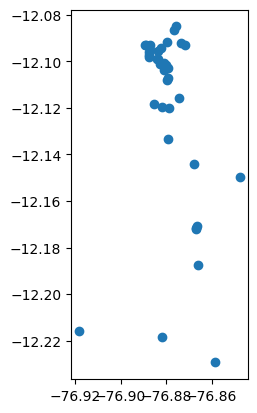

In [8]:
gdf_ollas_comunes.plot()

In [9]:
lima_distritos = gpd.read_file(
    "https://storage.googleapis.com/up_public_geodata/admin_bounds/peru/districts.zip"
)

In [10]:
lima_distritos.head()

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,IDDIST,DISTRITO,CAPITAL,CODCCPP,AREA,FUENTE,geometry
0,10,HUANUCO,1009,PUERTO INCA,100902,CODO DEL POZUZO,CODO DEL POZUZO,0001,1,INEI,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297..."
1,10,HUANUCO,1009,PUERTO INCA,100904,TOURNAVISTA,TOURNAVISTA,0001,1,INEI,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,25,UCAYALI,2503,PADRE ABAD,250305,ALEXANDER VON HUMBOLDT,ALEXANDER VON HUMBOLDT,0001,1,INEI,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,25,UCAYALI,2503,PADRE ABAD,250302,IRAZOLA,SAN ALEJANDRO,0001,1,INEI,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,25,UCAYALI,2503,PADRE ABAD,250304,NESHUYA,MONTE ALEGRE,0001,1,INEI,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."


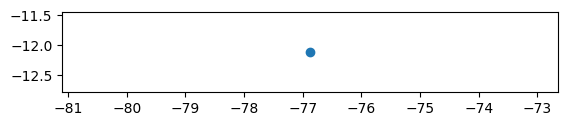

In [11]:
manchay = up.download.nominatim_osm("Manchay, Lima, Peru")  # Point
manchay.crs = "EPSG:4326"
ax = manchay.plot()

In [12]:
from shapely.geometry import Point

In [13]:
MARGIN = 0.1
distance_meters = Point(-74.3764, -9.1429).distance(Point(-75.3764, -9.1429))

/tmp/ipykernel_22418/3223653846.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  minx, miny, maxx, maxy = manchay.buffer(0.15).envelope.total_bounds
/tmp/ipykernel_22418/3223653846.py:26: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  handles, labels = ax.get_legend_handles_labels()


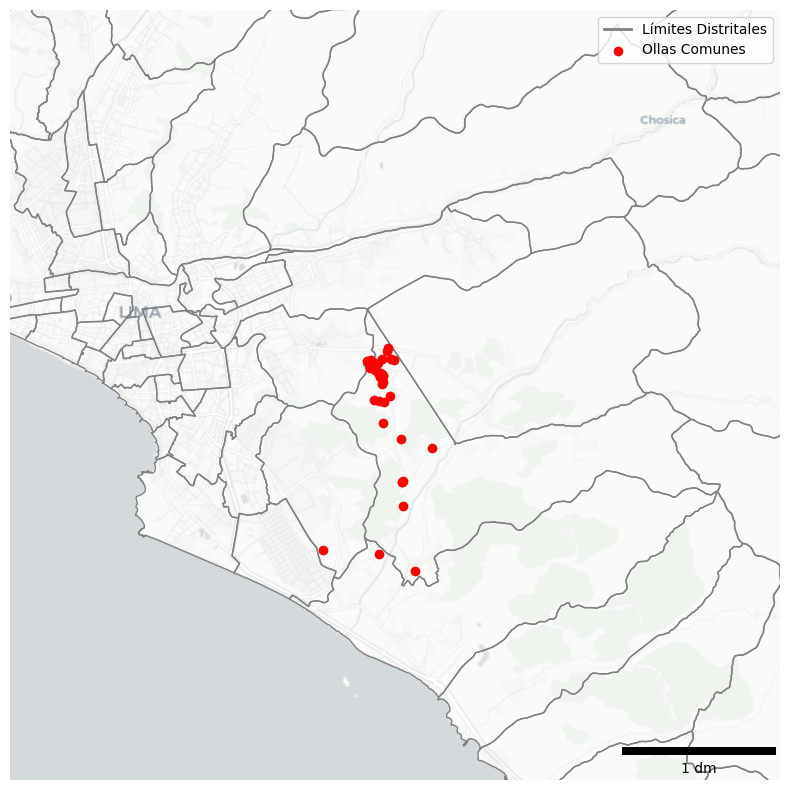

In [14]:
ax = lima_distritos.plot(
    facecolor="none",
    edgecolor="gray",
    label="Límites Distritales",
    figsize=(10, 10),
)

# Ollas comunes
gdf_ollas_comunes.plot(
    color="r",
    label="Ollas Comunes",
    ax=ax,
)

minx, miny, maxx, maxy = manchay.buffer(0.15).envelope.total_bounds
margins = MARGIN
ax.set_xlim(minx - margins, maxx + margins)
ax.set_ylim(miny - margins, maxy + margins)

ax.set_axis_off()
cx.add_basemap(
    ax=ax, source=cx.providers.CartoDB.Positron, crs="EPSG:4326", attribution=""
)

# Add label of the urbanization to the legend
handles, labels = ax.get_legend_handles_labels()
handles.insert(0, Line2D([0], [0], color="gray", lw=2, label="Límites Distritales"))
labels.insert(0, "Límites Distritales")
plt.legend(handles=handles, labels=labels, loc="upper right")

ax.add_artist(ScaleBar(distance_meters, location="lower right", box_alpha=0))

plt.savefig(
    "outputs/producto_3/maps/ollas_comunes.png",
    dpi=300,
    bbox_inches="tight",
)

In [15]:
gdf_ollas_comunes[
    ~gdf_ollas_comunes.within(
        lima_distritos[lima_distritos["DISTRITO"] == "PACHACAMAC"].geometry.iloc[0]
    )
]

,_Ubicacion GPS_latitude,_Ubicacion GPS_longitude,geometry
33,NaN,NaN,POINT EMPTY
36,-12.216040,-76.918200,POINT (-76.91820 -12.21604)
37,-12.218531,-76.881887,POINT (-76.88189 -12.21853)


In [16]:
df_ollas_comunes.loc[
    gdf_ollas_comunes[
        ~gdf_ollas_comunes.within(
            lima_distritos[lima_distritos["DISTRITO"] == "PACHACAMAC"].geometry.iloc[0]
        )
    ].index
].to_clipboard()

/tmp/ipykernel_22418/483466996.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  minx, miny, maxx, maxy = manchay.buffer(0.05).envelope.total_bounds
/tmp/ipykernel_22418/483466996.py:26: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  handles, labels = ax.get_legend_handles_labels()


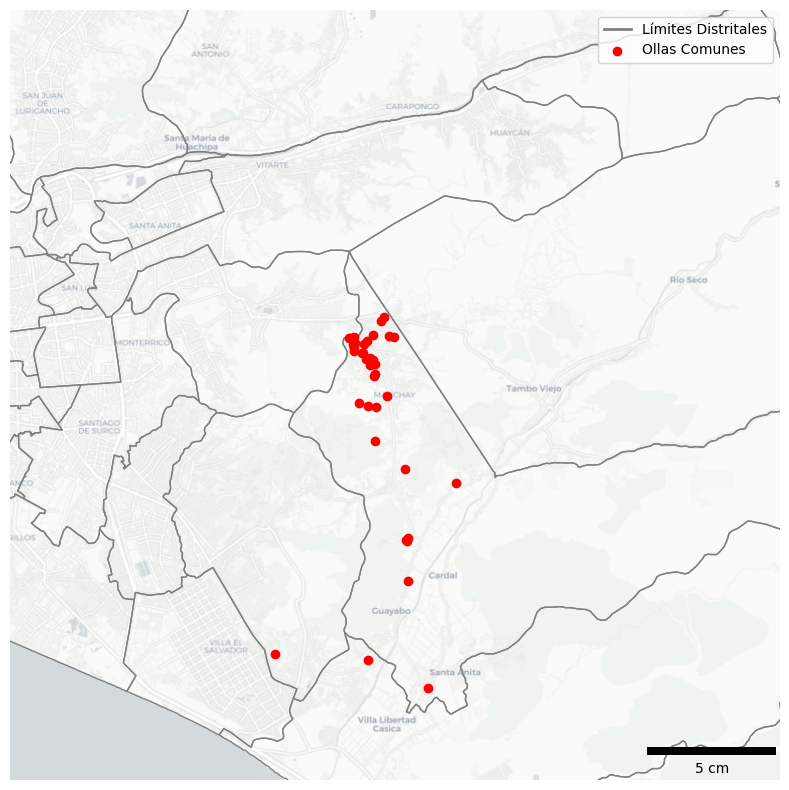

In [17]:
ax = lima_distritos.plot(
    facecolor="none",
    edgecolor="gray",
    label="Límites Distritales",
    figsize=(10, 10),
)

# Ollas comunes
gdf_ollas_comunes.plot(
    color="r",
    label="Ollas Comunes",
    ax=ax,
)

minx, miny, maxx, maxy = manchay.buffer(0.05).envelope.total_bounds
margins = MARGIN
ax.set_xlim(minx - margins, maxx + margins)
ax.set_ylim(miny - margins, maxy + margins)

ax.set_axis_off()
cx.add_basemap(
    ax=ax, source=cx.providers.CartoDB.Positron, crs="EPSG:4326", attribution=""
)

# Add label of the urbanization to the legend
handles, labels = ax.get_legend_handles_labels()
handles.insert(0, Line2D([0], [0], color="gray", lw=2, label="Límites Distritales"))
labels.insert(0, "Límites Distritales")
plt.legend(handles=handles, labels=labels, loc="upper right")

ax.add_artist(ScaleBar(distance_meters, location="lower right", box_alpha=0))

plt.savefig(
    "outputs/producto_3/maps/ollas_comunes_zoomed.png",
    dpi=300,
    bbox_inches="tight",
)

/tmp/ipykernel_22418/2573645141.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_ollas_comunes[gdf_ollas_comunes.within(manchay.buffer(0.05).envelope[0])],
/tmp/ipykernel_22418/2573645141.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  minx, miny, maxx, maxy = manchay.buffer(0.05).envelope.total_bounds
/tmp/ipykernel_22418/2573645141.py:29: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  handles, labels = ax.get_legend_handles_labels()


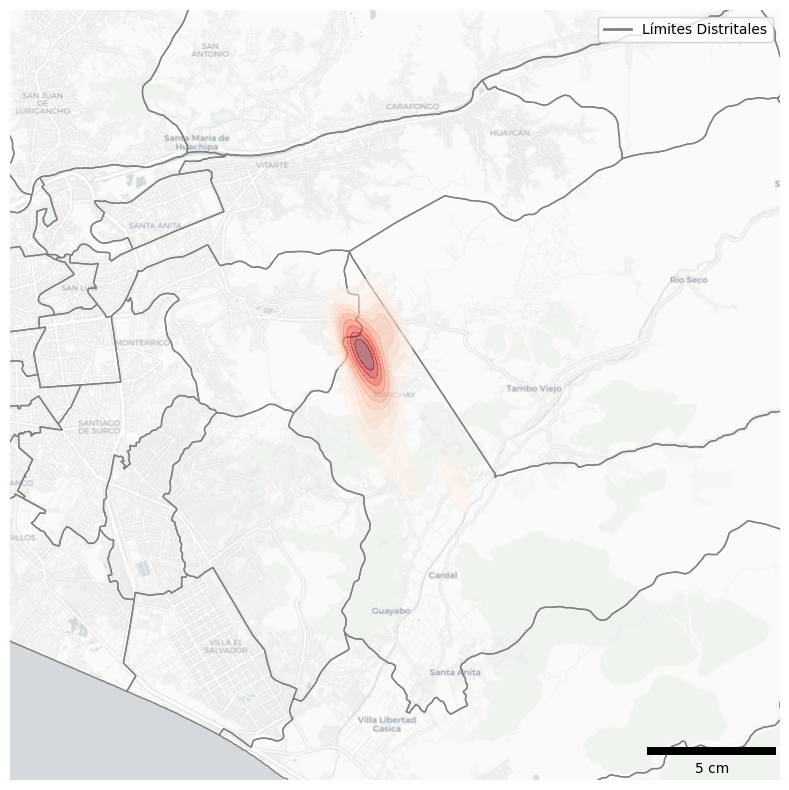

In [18]:
ax = lima_distritos.plot(
    facecolor="none",
    edgecolor="gray",
    label="Límites Distritales",
    figsize=(10, 10),
)

# Ollas comunes
gplt.kdeplot(
    gdf_ollas_comunes[gdf_ollas_comunes.within(manchay.buffer(0.05).envelope[0])],
    cmap="Reds",
    ax=ax,
    fill="True",
    alpha=0.5,
    thresh=0.05,  # cbar=True, cbar_ax=cax,
)

minx, miny, maxx, maxy = manchay.buffer(0.05).envelope.total_bounds
margins = MARGIN
ax.set_xlim(minx - margins, maxx + margins)
ax.set_ylim(miny - margins, maxy + margins)

ax.set_axis_off()
cx.add_basemap(
    ax=ax, source=cx.providers.CartoDB.Positron, crs="EPSG:4326", attribution=""
)

# Add label of the urbanization to the legend
handles, labels = ax.get_legend_handles_labels()
handles.insert(0, Line2D([0], [0], color="gray", lw=2, label="Límites Distritales"))
labels.insert(0, "Límites Distritales")
plt.legend(handles=handles, labels=labels, loc="upper right")

ax.add_artist(ScaleBar(distance_meters, location="lower right", box_alpha=0))

plt.savefig(
    "outputs/producto_3/maps/ollas_comunes_zoomed_heatmap.png",
    dpi=300,
    bbox_inches="tight",
)

In [25]:
df_ollas_comunes.shape, gdf_ollas_comunes.shape

((39, 7), (39, 3))

In [22]:
df1 = pd.read_excel("/home/claudio/Downloads/Ollas Pachacamac Mancachay.xlsx", skiprows=1)
df1.head()

,N°,Código Olla Común,Nombre de las Ollas Comunes,Dirección de las Ollas Comunes,Departamento,Provincia,Distrito,Ubigeo,Estado,N° Benef. Padrón
0,2890,X1501230005,LA ESPERANZA DE BRISAS,MZ C LOTE 18 ASOCIACION AVIS LAS BRISAS,LIMA,LIMA,PACHACAMAC,150123,Activo,107
1,2891,X1501230006,SAN MARTIN DE PORRES AMPLIACION AA.HH. VIRGEN ...,"AV MALECON ESPIRITU SANTO MZ G LOTE 10, AAHH A...",LIMA,LIMA,PACHACAMAC,150123,Activo,80
2,2892,X1501230014,SEÑOR DE LOS MILAGROS,MZ G-5 LOTE 16 AMPLIACION PORTADA III,LIMA,LIMA,PACHACAMAC,150123,Activo,76
3,2893,X1501230016,NIÑO JESUS DEL ASENTAMIENTO HUMANO PORTADA DE ...,MZ B-4 LOTE 15 AAHH SAN PABLO MIRADOR,LIMA,LIMA,PACHACAMAC,150123,Activo,87
4,2894,X1501230018,NATIVIDAD DE MARIA MZ F SAN PABLO MIRADOR,MZ F-1 LOTE 01,LIMA,LIMA,PACHACAMAC,150123,Activo,79


In [23]:
df1.shape

(86, 10)

In [26]:
df2 = pd.read_excel("/home/claudio/Downloads/datos_especificos_ollas.xlsx")
df2.head()

,Nombre de la olla común,Gestión de la olla común,"¿Cuántas personas trabajan a diario en la gestión de la olla común? (búsqueda/compra de alimentos, recuperación de alimentos, preparación y entrega de alimentos, limpieza, etc.) Sólo coloque el número de personas, por ejemplo, 10","¿Cuántas de esas personas son mujeres? (Coloque solo el número de personas, por ejemplo, 9)",Abastecimiento de alimentos,"¿Cuántas personas a la semana se dedican a buscar/comprar los alimentos? (Coloque sólo el número de personas, por ejemplo, 9)","¿Cuántas de esas personas son mujeres? (Coloque sólo el número de personas, por ejemplo, 9)","¿Cuántas horas a la semana se dedica en promedio una persona para buscar/comprar los alimentos? (Coloque sólo el número de horas, por ejemplo, 3)",Preparación de alimentos,"¿Cuántas personas al día se dedican a preparar los alimentos? (Coloque sólo el número de personas, por ejemplo, 9)","¿Cuántas de esas personas son mujeres? (Coloque sólo el número de personas, por ejemplo, 9).1","¿Cuántas horas al día se dedica en promedio una persona a preparar los alimentos? (Coloque solo el número de horas, por ejemplo, 3)",Reparto de alimentos,"¿Cuántas personas al día se dedican a repartir los alimentos? (Coloque sólo el número de personas, por ejemplo, 9)","¿Cuántas de esas personas son mujeres? (Coloque sólo el número de personas, por ejemplo, 9).2","¿Cuántas horas al día se dedica en promedio una persona a repartir los alimentos? (Coloque solo el número de horas, por ejemplo, 3)",Limpieza del local donde funciona la olla común,"¿Cuántas personas al día se dedican a la limpieza? (Coloque sólo el número de personas, por ejemplo, 9)","¿Cuántas de esas personas son mujeres? (Coloque sólo el número de personas, por ejemplo, 9).3","¿Cuántas horas al día se dedica en promedio una persona a la limpieza? (Coloque sólo el número de horas, por ejemplo, 3)"
0,Santima Cruz de Paul Poblet,NaN,5,2.0,NaN,NaN,2,NaN,NaN,2,5,4,NaN,5,3,8,NaN,3.0,5,2
1,Mirador de Los Angeles,NaN,4,NaN,NaN,2.0,2,4.0,NaN,3,3,4,NaN,2,2,1,NaN,1.0,1,1
2,El Milagro de Renacer,NaN,12,12.0,NaN,4.0,3,6.0,NaN,3,3,4,NaN,4,4,2,NaN,4.0,3,4
3,Jireh Parte Baja,NaN,4,NaN,NaN,2.0,2,2.0,NaN,2,2,2,NaN,2,2,2,NaN,3.0,3,2
4,Virgen del Rosario,NaN,5,1.0,NaN,3.0,3,2.0,NaN,4,4,7,NaN,4,4,2,NaN,4.0,4,2


In [27]:
df2.shape

(29, 20)

In [29]:
df3 = pd.read_excel("/home/claudio/Downloads/Análisis_de_las_Ollas_Comunes_Lima_Metropolitana_-_all_versions_-_labels_-_2023-02-23-01-03-45.xlsx")
df3.head()

,start,end,Nombre de la olla común,Nombre de la persona responsable (Presidente/a),Teléfono de la persona de contacto,Dirección de la olla común,Distrito de la olla común,¿Dónde cocina la olla común?,"Por favor, especifique:","¿Cuándo comenzó a funcionar la olla común? (colocar mes y año, ejemplo: enero 2020)",...,_id,_uuid,_submission_time,_validation_status,_notes,_status,_submitted_by,__version__,_tags,_index
0,2022-10-19 14:36:45.587,2022-10-19 14:50:47.044,Santima Cruz de Paul Poblet,NaN,953797304,Mz C lote 1 A.H. Paul Poblet Lind,Pachacámac,Otro,Terreno cedido por la directiva,16 setiembre 2021,...,193596702,7ac31ec1-2dae-4942-81da-68f46290db74,2022-10-19 19:50:57,NaN,NaN,submitted_via_web,NaN,vL9KbAcSn8CYpKzoVBVLhv,NaN,1
1,2022-10-19 14:51:28.805,2022-10-19 15:57:15.504,Mirador de Los Angeles,Gregoria Lapa Gutiérrez,988492996,Mz E Lote 11,Pachacámac,En la casa de un/a vecino/a,NaN,11 febrero 2021,...,193618164,e2bc10e3-08a4-43ef-9ad0-9167d241f6e5,2022-10-19 21:42:48,NaN,NaN,submitted_via_web,NaN,vMwzBYvJpzMqto9u3QVpAa,NaN,2
2,2022-10-19 15:57:15.938,2022-10-19 16:59:43.789,El Milagro de Renacer,Soledad Consuelo Rojas Suñiga,997167128,Mz O2 Lt 1,Pachacámac,En un local comunal,NaN,27 julio 2020,...,193629839,3482a090-4438-4cba-b3d3-9bb7c2b22a83,2022-10-19 23:13:48,NaN,NaN,submitted_via_web,NaN,vMwzBYvJpzMqto9u3QVpAa,NaN,3
3,2022-10-19 16:59:44.121,2022-10-19 18:25:32.351,Jireh Parte Baja,Mirian Mariole Inga Villalva,916254735,Mz K Lt 17,Pachacámac,Otro,Área Verde,26 junio 2020,...,193630775,438ac685-6af8-46db-ad9b-d47e7fd65903,2022-10-19 23:25:42,NaN,NaN,submitted_via_web,NaN,vMwzBYvJpzMqto9u3QVpAa,NaN,4
4,2022-10-19 18:25:32.667,2022-10-19 19:22:43.118,Virgen del Rosario,Norma Jara,955621346,Mz F3A Lt 1 Ampl. Los Cedros,Pachacámac,En un local comunal,NaN,27 de julio 2020,...,193634318,492328b0-9523-4b5b-baa7-d32e484be22b,2022-10-20 00:22:56,NaN,NaN,submitted_via_web,NaN,vMwzBYvJpzMqto9u3QVpAa,NaN,5


In [30]:
df3.shape

(29, 152)

In [33]:
df3.iloc[:, 9].str.lower().tolist()

['16 setiembre 2021',
 '11 febrero 2021',
 '27 julio 2020',
 '26 junio 2020',
 '27 de julio 2020',
 'marzo 2020',
 'mayo 2020',
 '8 de abril 2020',
 '27 marzo 2020',
 'junio 2022',
 'junio 2020',
 'abril 2020',
 'enero 2021',
 '2020',
 '16 marzo 2020',
 'abril 2020',
 'setiembre 2020',
 'abril 2020',
 '1 de junio 2920',
 'setiembre 2020',
 '23 abril 2020',
 '25 junio 2020',
 'abril 2020',
 '7 enero 2022',
 'marzo 2020',
 'abril 2020',
 'abril 2021',
 '19 junio 2020',
 'julio 2020']

In [34]:
clean_dates = [
'16/09/2021',
'11/02/2021',
'27/07/2020',
'26/06/2020',
'27/07/2020',
'01/03/2020',
'01/05/2020',
'08/04/2020',
'27/03/2020',
'01/06/2022',
'01/06/2020',
'01/04/2020',
'01/01/2021',
'01/01/2020',
'16/03/2020',
'01/04/2020',
'01/09/2020',
'01/04/2020',
'01/06/2020',
'01/09/2020',
'23/03/2020',
'25/06/2020',
'01/03/2020',
'07/01/2022',
'01/03/2020',
'01/04/2020',
'01/04/2021',
'19/06/2020',
'01/07/2020',
]
df3["clean_start_date"] = pd.to_datetime(clean_dates, format="%d/%m/%Y")

In [35]:
df3["clean_start_date"].dt.year.value_counts()

2020    23
2021     4
2022     2
Name: clean_start_date, dtype: int64

In [57]:
# Generate a plot of the number of ollas comunes per month-year

# Create a dataframe with the number of ollas comunes per month-year
df3_count = df3["clean_start_date"].value_counts()
df3_count

2020-04-01    4
2020-03-01    3
2020-07-27    2
2020-06-01    2
2020-09-01    2
2020-01-01    1
2020-06-19    1
2021-04-01    1
2022-01-07    1
2020-06-25    1
2020-03-23    1
2020-03-16    1
2021-09-16    1
2021-01-01    1
2021-02-11    1
2022-06-01    1
2020-03-27    1
2020-04-08    1
2020-05-01    1
2020-06-26    1
2020-07-01    1
Name: clean_start_date, dtype: int64

In [61]:

# Fill missing months with 0
df3_month_year = df3_count.resample("M").sum().fillna(0)
df3_month_year

2020-01-31    1
2020-02-29    0
2020-03-31    6
2020-04-30    5
2020-05-31    1
2020-06-30    5
2020-07-31    3
2020-08-31    0
2020-09-30    2
2020-10-31    0
2020-11-30    0
2020-12-31    0
2021-01-31    1
2021-02-28    1
2021-03-31    0
2021-04-30    1
2021-05-31    0
2021-06-30    0
2021-07-31    0
2021-08-31    0
2021-09-30    1
2021-10-31    0
2021-11-30    0
2021-12-31    0
2022-01-31    1
2022-02-28    0
2022-03-31    0
2022-04-30    0
2022-05-31    0
2022-06-30    1
Freq: M, Name: clean_start_date, dtype: int64

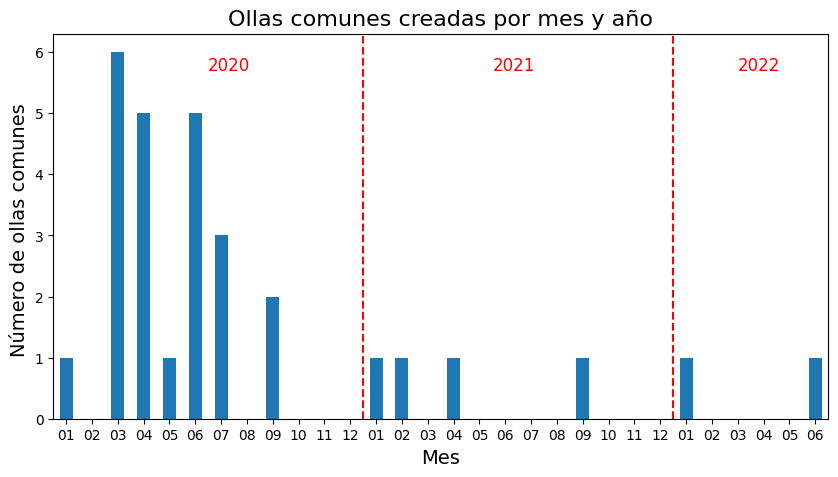

In [75]:
# Plot
plt.figure(figsize=(10, 5))

df3_month_year.plot.bar(x="index", y="clean_start_date")

# Make a two level xticks labels with the month and year
plt.xticks(
    range(len(df3_month_year.index)),
    [str(x.strftime("%m")) for x in df3_month_year.index],
    rotation=0,
)

# Vertical lines for the years 2020 and 2021
plt.axvline(x=11.5, color="red", linestyle="--")
plt.axvline(x=23.5, color="red", linestyle="--")

# Add text for the years 2020 and 2021
plt.text(5.5, 5.7, "2020", fontsize=12, color="red")
plt.text(16.5, 5.7, "2021", fontsize=12, color="red")
plt.text(26, 5.7, "2022", fontsize=12, color="red")

# Add title and labels
plt.title("Ollas comunes creadas por mes y año", fontsize=16)
plt.xlabel("Mes", fontsize=14)
plt.ylabel("Número de ollas comunes ", fontsize=14)

# Save figure
plt.savefig(
    "outputs/ollas_comunes_per_month_year.png",
    dpi=300,
    bbox_inches="tight",
)

<Figure size 1000x500 with 0 Axes>

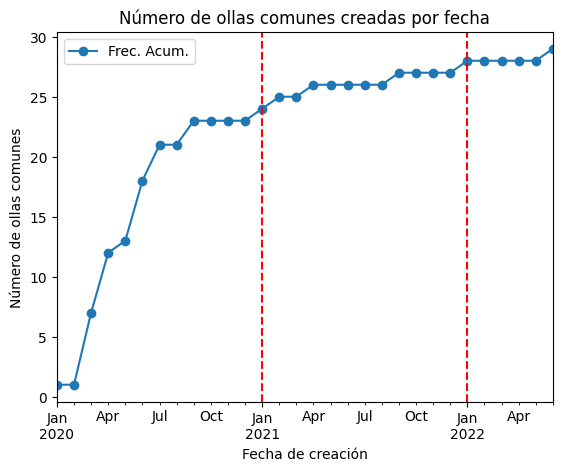

In [129]:
# Plot
plt.figure(figsize=(10, 5))

# Cumulative sum
df3_month_year.cumsum().reset_index().plot.line(x="index", y="clean_start_date", marker="o", label="Frec. Acum.")

# plt.legend(loc="lower right")
# Clean x ticks labels
# plt.xticks(rotation=90)
plt.xlabel("Fecha de creación")
plt.ylabel("Número de ollas comunes")
plt.title("Número de ollas comunes creadas por fecha")

# Vertical lines for the years 2020 and 2021
plt.axvline(x=datetime(2022, 1, 1), color="red", linestyle="--")
plt.axvline(x=datetime(2021, 1, 1), color="red", linestyle="--")

# Add text for the years 2020 and 2021
# plt.text(datetime(2020, 4, 1), 28, "2020", fontsize=12, color="red")
# plt.text(datetime(2021, 4, 1), 28, "2021", fontsize=12, color="red")

# Save figure
plt.savefig(
    "outputs/ollas_comunes_per_month_year_cumsum.png",
    dpi=300,
    bbox_inches="tight",
)

In [101]:
from datetime import datetime

Text(2021-04-01 00:00:00, 28, '2021')

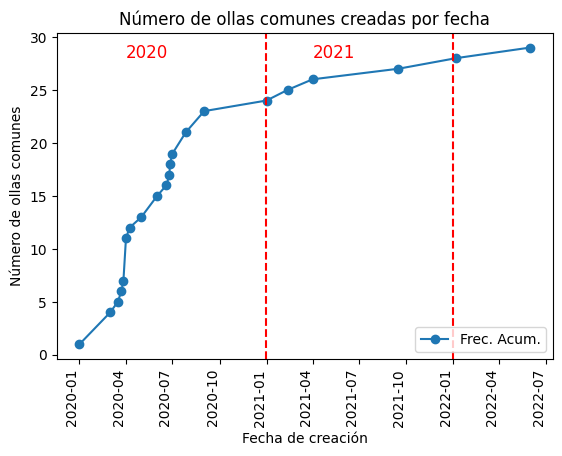

In [112]:
scatter_df = df3_count.sort_index().reset_index()
scatter_df.columns = ["date", "number"]
scatter_df["cumsum"] = scatter_df["number"].cumsum()
scatter_df.plot.line(x="date", y="cumsum", marker="o", label="Frec. Acum.")
plt.legend(loc="lower right")
# Clean x ticks labels
plt.xticks(rotation=90)
plt.xlabel("Fecha de creación")
plt.ylabel("Número de ollas comunes")
plt.title("Número de ollas comunes creadas por fecha")

# Vertical lines for the years 2020 and 2021
plt.axvline(x=datetime(2021, 12, 31), color="red", linestyle="--")
plt.axvline(x=datetime(2020, 12, 31), color="red", linestyle="--")

# Add text for the years 2020 and 2021
plt.text(datetime(2020, 4, 1), 28, "2020", fontsize=12, color="red")
plt.text(datetime(2021, 4, 1), 28, "2021", fontsize=12, color="red")


<AxesSubplot: xlabel='index', ylabel='clean_start_date'>

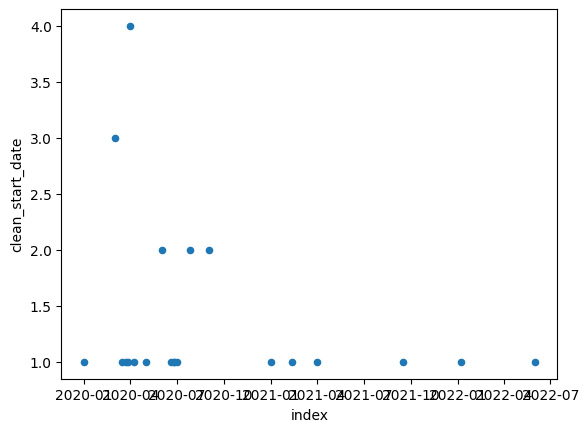

In [82]:
# Scatter plot of the number of ollas comunes per month-year

df3_count.reset_index().plot.scatter(x="index", y="clean_start_date")